reference: https://zhuanlan.zhihu.com/p/101799677

In [1]:
import torch
torch.__version__

'1.6.0'

In [2]:
from __future__ import print_function
import torch

In [3]:
x = torch.empty(5, 3)
print(x)

tensor([[-3.9830e+18,  5.4651e-43, -3.9830e+18],
        [ 5.4651e-43, -3.9828e+18,  5.4651e-43],
        [-3.9828e+18,  5.4651e-43, -3.9826e+18],
        [ 5.4651e-43, -3.9826e+18,  5.4651e-43],
        [-3.9826e+18,  5.4651e-43, -3.9826e+18]])


In [4]:
x = torch.rand(5, 3)
print(x)

tensor([[0.6604, 0.7379, 0.1192],
        [0.8583, 0.0164, 0.2356],
        [0.7433, 0.1963, 0.9755],
        [0.8687, 0.3586, 0.6321],
        [0.1501, 0.7177, 0.6657]])


In [5]:
x = torch.zeros(5, 3)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [6]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [7]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [8]:
import torch
x = x.new_ones(5, 3, dtype=torch.double)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [9]:
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[-0.4872, -0.0134,  0.8560],
        [-0.4319,  1.9692,  0.6007],
        [-1.3057,  0.1212,  1.5204],
        [ 1.1853, -0.8292,  0.1865],
        [ 0.8168, -0.5766,  1.1799]])


In [10]:
# 獲取size
print(x.size())
torch.Size([5,3])

torch.Size([5, 3])


torch.Size([5, 3])

In [11]:
y = torch.rand(5,3)
print(x+y)

tensor([[ 0.4979,  0.6362,  0.9685],
        [-0.1553,  2.4654,  1.2631],
        [-0.6036,  0.9839,  2.3661],
        [ 1.4032, -0.3995,  0.7656],
        [ 1.5628,  0.3429,  1.1966]])


In [12]:
# 加法2
print(torch.add(x,y))

tensor([[ 0.4979,  0.6362,  0.9685],
        [-0.1553,  2.4654,  1.2631],
        [-0.6036,  0.9839,  2.3661],
        [ 1.4032, -0.3995,  0.7656],
        [ 1.5628,  0.3429,  1.1966]])


In [13]:
result = torch.empty(5,3)
torch.add(x, y, out = result)
print(result)

tensor([[ 0.4979,  0.6362,  0.9685],
        [-0.1553,  2.4654,  1.2631],
        [-0.6036,  0.9839,  2.3661],
        [ 1.4032, -0.3995,  0.7656],
        [ 1.5628,  0.3429,  1.1966]])


In [14]:
# 替換, adds x to y
y.add_(x)
print(y)

tensor([[ 0.4979,  0.6362,  0.9685],
        [-0.1553,  2.4654,  1.2631],
        [-0.6036,  0.9839,  2.3661],
        [ 1.4032, -0.3995,  0.7656],
        [ 1.5628,  0.3429,  1.1966]])


In [15]:
print(x[:, 1])

tensor([-0.0134,  1.9692,  0.1212, -0.8292, -0.5766])


In [16]:
# torch.view与Numpy的reshape类似
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8) # size -1 從其他維度推斷
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [17]:
# 如果你有只有一个元素的张量，使用.item()来得到Python数据类型的数值
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.9878])
0.9878203272819519


将Torch Tensor转换成NumPy array，反之亦然，这是轻而易举的。 Torch Tensor和NumPy array将共享它们的底层内存位置，更改其中一个将更改另一个。 将Torch Tensor转换为NumPy array。

In [18]:
import torch
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [19]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [20]:
# see how the numpy array changed in value
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


### NumPy Array 转化成 Torch Tensor

In [21]:
# 使用from_numpy自動轉化
import numpy as np
a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


所有的 Tensor 类型默认都是基于CPU， CharTensor 类型不支持到 NumPy 的转换.

In [22]:
# CUDA 张量. 使用.to 方法 可以将Tensor移动到任何设备中

# is_available 函數判斷是否有cuda可以使用
# ``torch.device`` 將張量移動到指定的設備中
if torch.cuda.is_available():
    device = torch.device("cuda") # a CUDA 設備對象
    y = torch.ones_like(x, device=device) # 直接從GPU創建張量 
    x = x.to(device) #或者直接使用``.to("cuda")``將張量移動到CUDA中
    z = x + y
    print(z)
    print(z.to('cpu', torch.double))  # ``.TO``也會對變量的類型做更改

tensor([1.9878], device='cuda:0')
tensor([1.9878], dtype=torch.float64)


自动求导

In [23]:
%matplotlib inline

In [24]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [25]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [26]:
print(y.grad_fn)

In [27]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [28]:
a = torch.randn(2, 2)
a = ((a*3)/(a-1))
print(a.requires_grad)
print(a.grad_fn)

a.requires_grad_(True)
print(a.requires_grad)
b = (a*a).sum()
print(b.grad_fn)

False
None
True


In [29]:
out.backward()

In [30]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [31]:
x = torch.randn(3, requires_grad=True)
y = x * 2
while y.data.norm() < 1000:
    y = y * 2
    
print(y)

tensor([ -136.4454, -1110.6400,   915.3831], grad_fn=<MulBackward0>)


In [32]:
gradients = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(gradients)
print(x.grad)

tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


In [33]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
    print((x**2).requires_grad)

True
True
False


神经网络

In [34]:
%matplotlib inline

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)
Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

用cifar10训练一个分类器

In [36]:
import torch
import torchvision
import torchvision.transforms as transforms

In [39]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, transform= transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, 
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                          download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                            shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified
Files already downloaded and verified


 bird truck  bird  ship


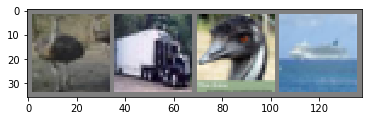

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# 展示圖像的函數
def imshow(img):
    img = img/2 + 0.5  #unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
# 獲取隨機數據
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 展示圖象
imshow(torchvision.utils.make_grid(images))

# 顯示圖像標簽
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))